In [7]:
library("readxl")
library("SNPassoc")
library(dplyr)

# xls files
my_data <- read_excel("./data/data_Ali.xlsx")

In [9]:
# my_data

In [10]:
data(my_data, package = "SNPassoc")
# str(my_data, list.len=9)

Warning message in data(my_data, package = "SNPassoc"):
“data set ‘my_data’ not found”


In [13]:
idx <- grep("^rs", colnames(my_data))
my_data.s <- setupSNP(data=my_data, colSNPs=idx, sep="")

In [14]:
d <- summary(my_data.s, print=FALSE)

             alleles major.allele.freq HWE      missing (%)
rs9465871    T/C      71.1             0.058810 0          
rs17059668   C/G      73.8             0.315682 0          
rs10401969   T/C      93.1             1.000000 0          
rs2281727    A/G      72.9             0.324363 0          
rs12628032   C/T      70.5             0.352599 0          
rs10883903   A/G      70.8             0.711451 0          
rs138535227  T/C      99.7             1.000000 0          
rs2156552    T/A      83.1             0.786387 0          
rs11154027   C/T      64.5             0.611499 0          
rs2980853    A/C      57.8             0.429048 0          
rs6565653    G/T      75.9             0.529749 0          
rs13003675   C/T      63.6             0.183250 0          
rs78627331   A/C      99.1             1.000000 0          
rs13107325   C/T      98.2             1.000000 0          
rs1207709473 G       100.0             -        0          
rs1374910    C/T      90.1             0

In [15]:
write.csv(d, "./data/R_stat.csv", row.names=TRUE)

## With HWE


In [91]:
# plotMissing(my_data.s, print.labels.SNPs = FALSE)

In [16]:
hwe <- tableHWE(my_data.s)
# hwe

In [17]:
hwe2 <- tableHWE(my_data.s, Status)
# hwe2
write.csv(hwe2, "./data/hwe.csv", row.names=TRUE)

In [19]:
# snpNHWE <- hwe2[,1]>0.05 & hwe2[,2]<0.05
# rownames(hwe2)[snpNHWE]
# hwe2[snpNHWE,]

snps.ok <- rownames(hwe2)[hwe2[,1]>=0.01]

In [20]:

pos <- which(colnames(my_data)%in%snps.ok, useNames = FALSE)
my_data.s <- setupSNP(my_data, pos, sep="")
# association(Status ~ rs225131, data = my_data.s)

In [21]:
ans <- WGassociation(Status, data=my_data.s)
head(ans)

,comments,codominant,dominant,recessive,overdominant,log-additive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs9465871,NA,0.04141737,0.01565329,0.11220293,0.1228792,0.0119050
rs17059668,NA,0.63679039,0.82895239,0.34455545,0.7671198,0.5784796
rs2281727,NA,0.35685951,0.44845494,0.39617615,0.1849502,0.8487042
rs12628032,NA,0.25627559,0.59056088,0.09921212,0.5944464,0.2386101
rs10883903,NA,0.91282851,0.78287011,0.69180602,0.9573349,0.7005120
rs2156552,NA,0.21725269,0.50435090,0.08214310,0.9727048,0.2416298


Warning message:
“Use of `dat$SNP` is discouraged.
ℹ Use `SNP` instead.”
Warning message:
“Use of `dat$p.value` is discouraged.
ℹ Use `p.value` instead.”


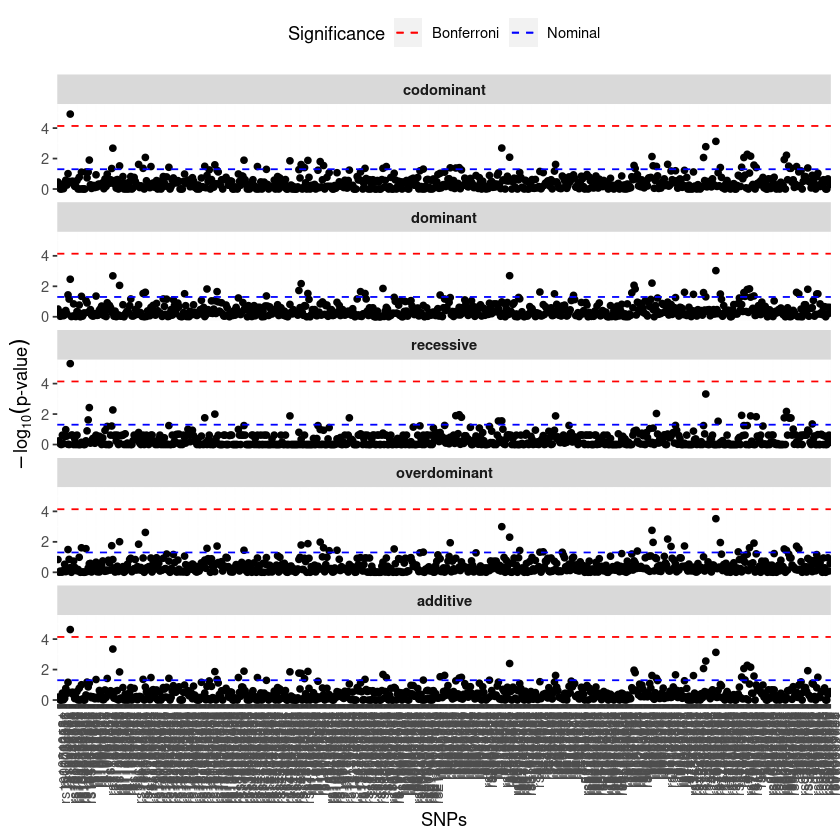

In [22]:
plot(ans)

In [23]:
# ans

In [24]:
write.csv(ans[order(ans$codominant), ], "./data/R_stat_p.csv", row.names=TRUE)

In [25]:
ans <- ans[order(ans$codominant), ]
ans <- ans[ans$codominant < 0.05, ]

rows = rownames(ans)

In [26]:
snp_list <- rows
results <- list()  # Initialize a list to store results for each SNP

for (snp in snp_list) {
  formula <- as.formula(paste("Status ~", snp))
  result <- association(formula, data = my_data.s)
  results[[snp]] <- result
}

In [38]:
file_path <- './data/confidence.txt'

# Capture the printed output
output <- capture.output(print(results))

# Write the captured output to a text file
writeLines(output, con = file_path)


## Without HWE need furter work to be done


In [13]:
pos <- which(colnames(my_data.s), useNames = FALSE)
pos

ERROR: Error in which(colnames(my_data.s), useNames = FALSE): argument to 'which' is not logical


In [26]:
pos <- colnames(my_data.s)

In [27]:
pos

[1] "...1"           "Unnamed: 0"     "Status"         "rs12628032"    
   [5] "rs56131196"     "rs1122590"      "rs34780867"     "rs1245583395"  
   [9] "rs7165301"      "rs1531343"      "rs118129783"    "rs762371932"   
  [13] "rs148504559"    "rs2315065"      "rs1380384779"   "rs199838752"   
  [17] "rs2241766"      "rs6081613"      "rs199668131"    "rs9465871"     
  [21] "rs1458038"      "rs1043815033"   "rs2048327"      "rs16942887"    
  [25] "rs4433740"      "rs5215"         "rs1374910"      "rs10832962"    
  [29] "rs2505083"      "rs2932538"      "rs1169289"      "rs699947"      
  [33] "rs769422860"    "rs10401969"     "rs141879881"    "rs11708067"    
  [37] "rs2237895"      "rs61903713"     "rs4660293"      "rs737337"      
  [41] "rs7578597"      "rs757110"       "rs12122341"     "rs75967811"    
  [45] "rs150240419"    "rs2642442"      "rs231361"       "rs1169288"     
  [49] "rs2072183"      "rs117724326"    "rs6841581"      "rs231362"      
  [53] "rs139533378"    "rs181362"       "rs9376090"      "rs563290928"   
  [57] "rs143869423"    "rs225132"       "rs2283183"      "rs3136441"     
  [61] "rs72654458"     "rs3136439"      "rs35549742"     "rs3136520"     
  [65] "rs1004467"      "rs149539813"    "rs2495497"      "rs11206510"    
  [69] "rs978308251"    "rs11810571"     "rs368650647"    "rs2479409"     
  [73] "rs79803700"     "rs36045724"     "rs76707333"     "rs6129648"     
  [77] "rs373551845"    "rs575752053"    "rs2929282"      "rs7087591"     
  [81] "rs78677915"     "rs10139550"     "rs2233580"      "rs3824004"     
  [85] "rs114315130"    "rs532332463"    "rs35679977"     "rs1377786184"  
  [89] "rs1009358"      "rs174556"       "rs16900615"     "rs539755221"   
  [93] "rs192081865"    "rs2128739"      "rs2839812"      "rs1041436146"  
  [97] "rs77408028"     "rs11257655"     "rs11212617"     "rs564398"      
 [101] "rs4855877"      "rs7623687"      "rs1327235"      "rs2287623"     
 [105] "rs5443"         "rs5442"         "rs2853579"      "rs4505078"     
 [109] "rs73021441"     "rs13292136"     "rs7952602"      "rs2980853"     
 [113] "rs2260671"      "rs2466294"      "rs10830963"     "rs12753465"    
 [117] "rs750268229"    "rs1552224"      "rs13421162"     "rs71413238"    
 [121] "rs2147980"      "rs4304924"      "rs142820536"    "rs849135"      
 [125] "rs4686698"      "rs189556443"    "rs2259820"      "rs11066320"    
 [129] "rs11066188"     "rs1181173872"   "rs17696736"     "rs1387153"     
 [133] "rs62510557"     "rs13266634"     "rs16889462"     "rs1374645"     
 [137] "rs3184504"      "rs17114036"     "rs1267993784"   "rs36119074"    
 [141] "rs849134"       "rs10946398"     "rs145877493"    "rs7754840"     
 [145] "rs953419805"    "rs1403856375"   "rs140080192"    "rs1221453380"  
 [149] "rs1800562"      "rs143175221"    "rs181181100"    "rs771893243"   
 [153] "rs13203361"     "rs1800594"      "rs9287090"      "rs112331368"   
 [157] "rs1800595"      "rs147741798"    "rs2916260"      "rs886045547"   
 [161] "rs80138222"     "rs9332607"      "rs12255372"     "rs115140649"   
 [165] "rs2943641"      "rs1046712"      "rs558486095"    "rs2281727"     
 [169] "rs9295474"      "rs17059668"     "rs35743590"     "rs7692395"     
 [173] "rs989258990"    "rs163184"       "rs1173771"      "rs9686661"     
 [177] "rs8068952"      "rs117202283"    "rs12940887"     "rs577629813"   
 [181] "rs9295475"      "rs2237896"      "rs73306622"     "rs2642438"     
 [185] "rs144056103"    "rs225131"       "rs17850677"     "rs9369640"     
 [189] "rs12526453"     "rs72847582"     "rs2156552"      "rs138535227"   
 [193] "rs141607720"    "rs1013168"      "rs4506565"      "rs200676405"   
 [197] "rs375480781"    "rs6511720"      "rs13376333"     "rs72627509"    
 [201] "rs2412772"      "rs10455872"     "rs41272078"     "rs11649653"    
 [205] "rs61823271"     "rs4846914"      "rs143742530"    "rs871606"      
 [209] "rs5219"         "rs8042680"      "rs73052917"     "rs4721377"     
 [213] "rs7173743"      "rs5

In [15]:

# pos <- which(colnames(my_data.s), useNames = FALSE)
# my_data.s <- setupSNP(my_data, pos, sep="")
association(Status ~ rs225131, data = my_data.s)


SNP: rs225131  adjusted by: 
              0    %   1    %   OR lower upper p-value   AIC
Codominant                                                  
T/T          19 47.5  58 44.3 1.00              0.8172 191.6
T/C          18 45.0  59 45.0 1.07  0.51  2.25              
C/C           3  7.5  14 10.7 1.53  0.40  5.90              
Dominant                                                    
T/T          19 47.5  58 44.3 1.00              0.7200 189.9
T/C-C/C      21 52.5  73 55.7 1.14  0.56  2.32              
Recessive                                                   
T/T-T/C      37 92.5 117 89.3 1.00              0.5440 189.7
C/C           3  7.5  14 10.7 1.48  0.40  5.42              
Overdominant                                                
T/T-C/C      22 55.0  72 55.0 1.00              0.9966 190.0
T/C          18 45.0  59 45.0 1.00  0.49  2.04              
log-Additive                                                
0,1,2        40 23.4 131 76.6 1.16  0.67  2.02  0.5850 

In [22]:
Status

ERROR: Error in eval(expr, envir, enclos): object 'Status' not found


In [24]:
# Splitting the SNP subset dataframe into smaller subsets
num_snps <- ncol(my_data.s)
subset_size <- 2000
num_subsets <- ceiling(num_snps / subset_size)

subset_list <- vector("list", num_subsets)
for (i in 1:num_subsets) {
  start <- (i - 1) * subset_size + 1
  end <- min(i * subset_size, num_snps)
  subset_list[[i]] <- cbind(my_data[["Status"]], my_data.s[, start:end])
}

# Running WGassociation on each subset
result_list <- vector("list", num_subsets)
for (i in 1:num_subsets) {
  result_list[[i]] <- WGassociation(subset_list[[i]][, -1], data = subset_list[[i]][, 1])
}

# Combining the results
combined_result <- do.call("rbind", result_list)


ERROR: Error in WGassociation(subset_list[[i]][, -1], data = subset_list[[i]][, : data must be an object of class 'setupSNP'


In [33]:
resuols <- WGassociation(Status, my_data.s[, 1:1000])

In [38]:
resuols[order(resuols$codominant), ]


,comments,codominant,dominant,recessive,overdominant,log-additive
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs13376333,NA,0.0001449338,2.714479e-05,0.2418258000,0.0001164382,4.784249e-05
rs10176176,NA,0.0007423603,3.781068e-03,0.0010910849,0.7315948840,2.349145e-04
rs10757283,NA,0.0009788169,3.087008e-02,0.0501546634,0.0001990431,8.046748e-01
rs6666258,NA,0.0012116085,2.647187e-04,0.2418258030,0.0009546335,3.523657e-04
rs77446482,NA,0.0017578790,NA,NA,NA,NA
rs1799945,NA,0.0019235570,2.749114e-03,1.0000000000,0.0010901110,1.923557e-03
rs7616006,NA,0.0026055387,6.374593e-01,0.0006761122,0.0705693702,5.493268e-02
rs61903713,NA,0.0058017050,NA,NA,NA,NA
rs763530,NA,0.0067540230,NA,NA,NA,NA


In [36]:
resuols[order(resuols[, 2]), ]

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


ERROR: Error in `[.WGassociation`(x, !nas): Undefined rows selected


In [16]:
ans <- WGassociation(Status, data=my_data.s)
head(ans)

ERROR: Error in WGassociation(Status, data = my_data.s): Select only one genetic model when more than 2000 SNPs are analyzed 
 or use 'scanWGassociation' function


Warning message:
“Use of `dat$SNP` is discouraged.
ℹ Use `SNP` instead.”
Warning message:
“Use of `dat$p.value` is discouraged.
ℹ Use `p.value` instead.”


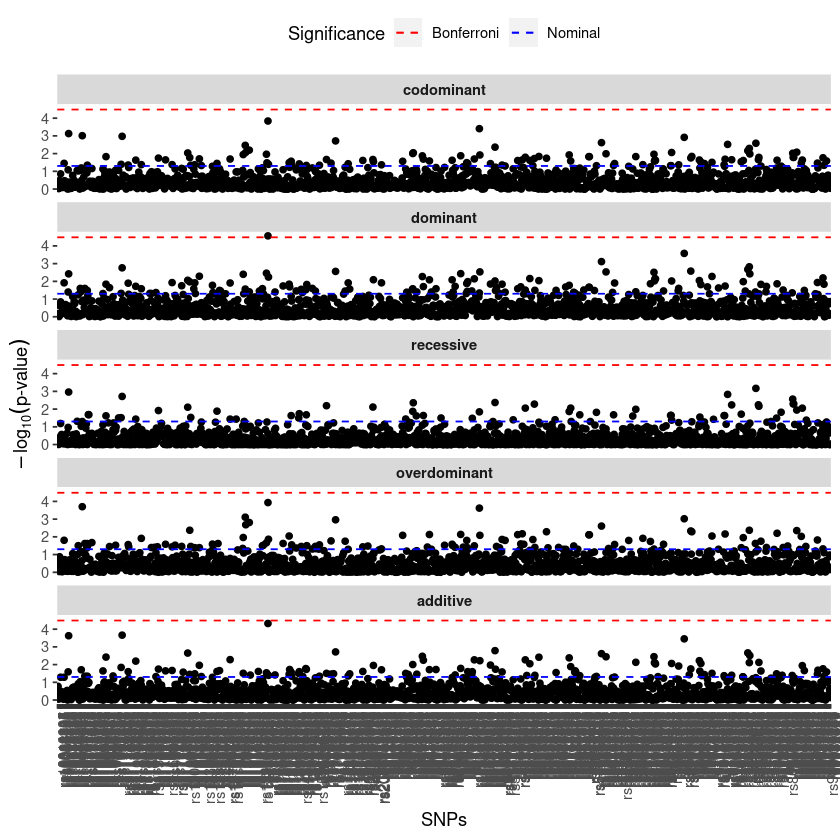

In [ ]:
plot(ans)

In [ ]:
ans

,comments,codominant,dominant,recessive,overdominant,log-additive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs12628032,NA,0.33465532,0.29681627,0.182284562,0.81841226,0.16035697
rs56131196,NA,0.24502447,0.43643379,0.241825803,0.19466920,0.77913328
rs1122590,NA,0.58099641,0.29911207,0.853197867,0.31697373,0.33246058
rs34780867,NA,0.95031784,0.75759470,0.977708522,0.76000824,0.80062576
rs7165301,NA,0.37172762,0.13757272,0.574123847,0.26952867,0.37172762
rs1531343,NA,0.58099641,0.29911207,0.853197867,0.31697373,0.33246058
rs2241766,NA,0.62339503,0.47923703,0.574123847,0.71619790,0.62339503
rs6081613,NA,0.52281915,0.51625353,0.276036531,0.89911188,0.31049117
rs9465871,NA,0.07214027,0.03244273,0.129360792,0.19648559,0.02185496


In [ ]:
write.csv(ans, "./data/R_stat_p.csv", row.names=TRUE)

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SNPassoc_2.1-0 readxl_1.4.2  

loaded via a namespace (and not attached):
 [1] httr_1.4.5         arsenal_3.6.3      tidyr_1.3.0        jsonlite_1.8.4    
 [5] viridisLite_0.4.1  splines_4.1.2      Formula_1.2-5      cellranger_1.1.0  
 [9] pillar_1.9.0       ba